# Feature extraction

# Step1
import dependencies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from IPython.display import display

# Step2
load the payloads into memory

In [3]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(30))

,payload,is_malicious,injection_type
index,,,
0,abellot*ada,0.0,LEGAL
1,1280x800,0.0,LEGAL
2,Juergen,0.0,LEGAL
3,ambitious,0.0,LEGAL
4,Shalne,0.0,LEGAL
5,joann,0.0,LEGAL
6,tonnage,0.0,LEGAL
7,Kowtow,0.0,LEGAL
8,3683134199988856,0.0,LEGAL


# Step3
feature engineering

In [14]:
def plot_feature_distribution(features):
    print('Properties of feature: ' + features.name)
    print(features.describe())
    f, ax = plt.subplots(1, figsize=(10, 6))
    ax.hist(features, bins=features.max()-features.min()+1, normed=1)
    ax.set_xlabel('value')
    ax.set_ylabel('fraction')
    
    plt.show()

,payload,is_malicious,injection_type,example,length
index,,,,,
0,abellot*ada,0.0,LEGAL,1,11
1,1280x800,0.0,LEGAL,1,8
2,Juergen,0.0,LEGAL,1,7
3,ambitious,0.0,LEGAL,1,9
4,Shalne,0.0,LEGAL,1,6


Properties of feature: example
count    110381.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: example, dtype: float64


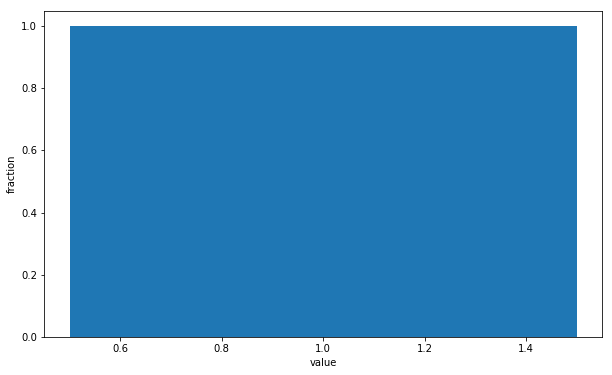

In [61]:
def create_feature_example(payloads):
    '''small description
    
    longer description
    '''
    
    payloads['example'] = [1 for row in payloads['payload']]
    return payloads

payloads = create_feature_example(payloads)
display(payloads.head())

plot_feature_distribution(payloads['example'])

,payload,is_malicious,injection_type,length,non-printable
index,,,,,
0,abellot*ada,0.0,LEGAL,11,0
1,1280x800,0.0,LEGAL,8,0
2,Juergen,0.0,LEGAL,7,0
3,ambitious,0.0,LEGAL,9,0
4,Shalne,0.0,LEGAL,6,0


Properties of feature: length
count    110381.000000
mean         16.647168
std          33.768929
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max        3024.000000
Name: length, dtype: float64


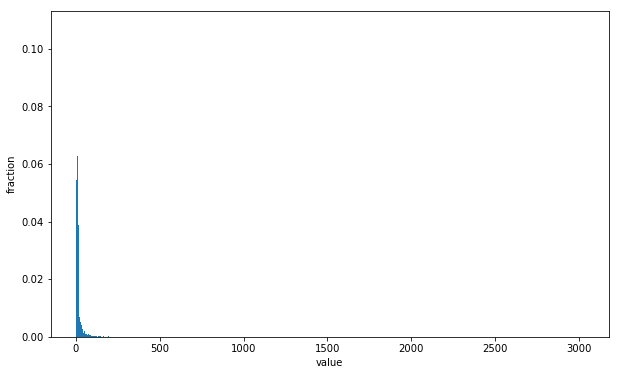

In [15]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)
display(payloads.head())


plot_feature_distribution(payloads['length'])


,payload,is_malicious,injection_type,length,non-printable,punctuation
index,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1
1,1280x800,0.0,LEGAL,8,0,0
2,Juergen,0.0,LEGAL,7,0,0
3,ambitious,0.0,LEGAL,9,0,0
4,Shalne,0.0,LEGAL,6,0,0


Properties of feature: non-printable
count    110381.000000
mean          0.007411
std           0.216713
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: non-printable, dtype: float64


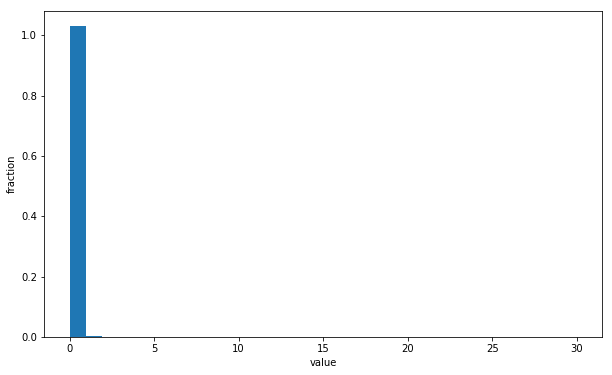

In [30]:
def number_of_printable_chars(payload):
    import string
    occurences = 0
    for letter in payload:
        if letter in string.printable:
            occurences = occurences + 1
    return occurences

def create_feature_non_printable_characters(payloads):
    
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['non-printable'] = [ len([1 for letter in str(row) if letter not in string.printable]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['non-printable'])


,payload,is_malicious,injection_type,length,non-printable,punctuation
index,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1
1,1280x800,0.0,LEGAL,8,0,0
2,Juergen,0.0,LEGAL,7,0,0
3,ambitious,0.0,LEGAL,9,0,0
4,Shalne,0.0,LEGAL,6,0,0


Properties of feature: punctuation
count    110381.000000
mean          2.438463
std          14.209566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        3012.000000
Name: punctuation, dtype: float64


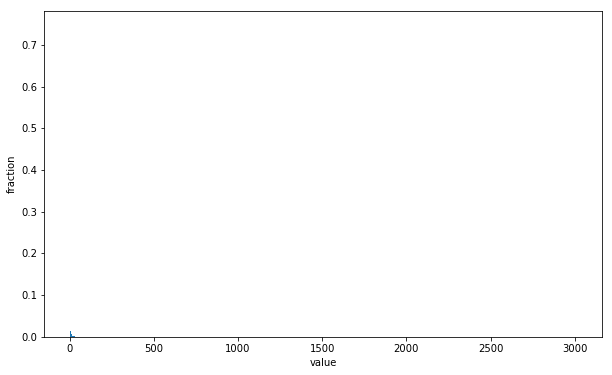

In [28]:
def create_feature_punctuation_characters(payloads):
    
    import string
    display(string.punctuation)
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['punctuation'] = [ len([1 for letter in str(row) if letter in string.punctuation]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['punctuation'])